In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import gmaps
import os

# Import API key
from api_keys import g_key
gmaps.configure(api_key=g_key)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#The space below is used for analysis of the data from the Clean_Data directory

In [3]:
# Eugene's codes start here

In [4]:
# Eugene's codes end here

In [5]:
# Feipeng's codes start here

In [6]:
# Feipeng's codes end here

In [7]:
# Ricardo's codes start here

In [8]:
# Ricardo's codes end here

#### Analysis between SVI vs. Viccination by county

In [9]:
# Jenny's codes start here

In [21]:
vaccine_svi_df = pd.read_csv("Clean_data/vaccine_svi_df.csv",low_memory=False)
vaccine_svi_df.describe()

,FIPS,Vaccination_Complete_Pct,Social Vulnerability Index (SVI),lat,long
count,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000
mean,28902.742477,42.240833,0.487302,39.069094,-91.467551
std,14799.780433,12.324798,0.286995,5.042229,12.906683
min,1001.000000,1.300000,0.010000,25.315618,-164.027212
25%,18071.500000,34.900000,0.240000,35.679449,-96.948326
50%,28094.000000,41.900000,0.480000,38.882962,-88.996165
75%,40078.500000,49.700000,0.740000,42.248572,-82.900416
max,56045.000000,99.900000,1.000000,69.312150,-67.628790


In [20]:
locations = vaccine_svi_df[["lat","long"]].astype(float)
vaccination_rate = vaccine_svi_df['Vaccination_Complete_Pct']

In [23]:
fig_layout = {'width': '800px',
              'height': '400px',
              'border': '1px solid black',
              'padding': '1px',
              'margin': '0 auto 0 auto'
             }
fig = gmaps.figure(layout=fig_layout)
heat_layer = gmaps.heatmap_layer(locations, weights=vaccination_rate, dissipating=False, max_intensity=vaccination_rate.max(), point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

The r value is: -0.22290867716012341
The r-squared is: 0.049688278353276126


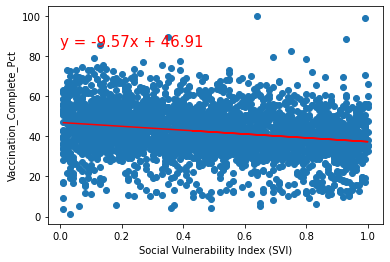

In [13]:
x_values = vaccine_svi_df['Social Vulnerability Index (SVI)']
y_values = vaccine_svi_df['Vaccination_Complete_Pct']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,85),fontsize=15,color="red")
plt.xlabel('Social Vulnerability Index (SVI)')
plt.ylabel('Vaccination_Complete_Pct')
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [14]:
#Anova Test

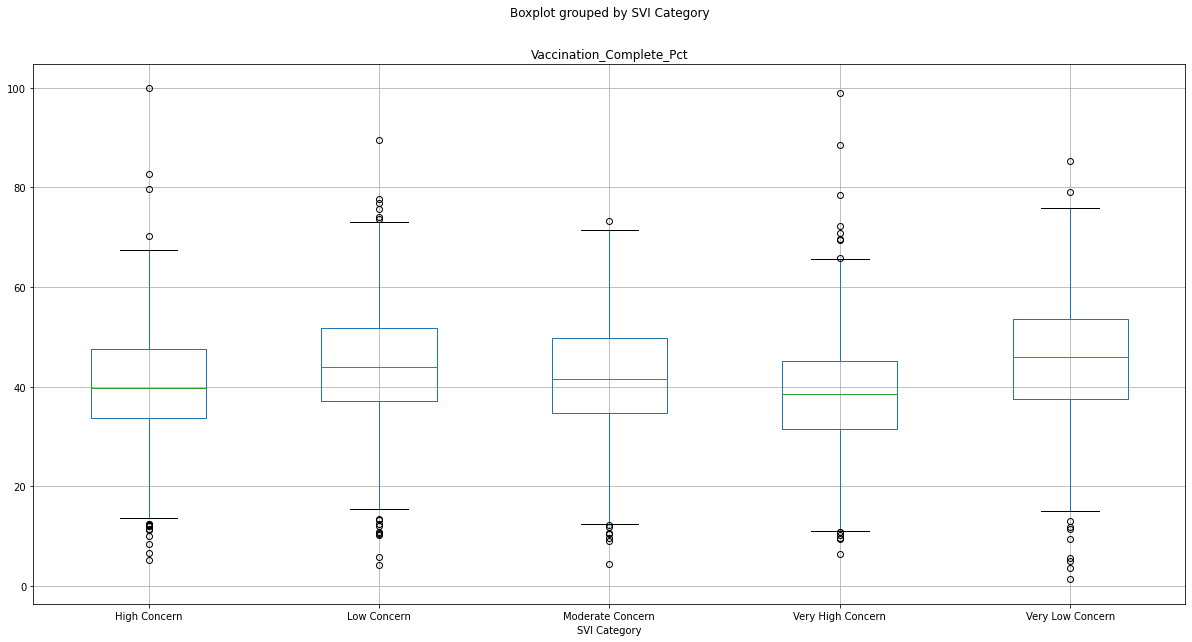

In [15]:
vaccine_svi_df.boxplot('Vaccination_Complete_Pct', by='SVI Category', figsize=(20, 10))
plt.show()

In [16]:
svi_very_high_concern = vaccine_svi_df.loc[vaccine_svi_df['SVI Category']=='Very High Concern']['Vaccination_Complete_Pct']
svi_high_concern = vaccine_svi_df.loc[vaccine_svi_df['SVI Category']=='High Concern']['Vaccination_Complete_Pct']
svi_moderate_concern = vaccine_svi_df.loc[vaccine_svi_df['SVI Category']=='Moderate Concern']['Vaccination_Complete_Pct']
svi_low_concern = vaccine_svi_df.loc[vaccine_svi_df['SVI Category']=='Low Concern']['Vaccination_Complete_Pct']
svi_very_low_concern = vaccine_svi_df.loc[vaccine_svi_df['SVI Category']=='Very Low Concern']['Vaccination_Complete_Pct']

In [17]:
st.f_oneway(svi_very_high_concern, svi_high_concern, svi_moderate_concern, svi_low_concern, svi_very_low_concern)

F_onewayResult(statistic=37.689671465273356, pvalue=9.114046064617615e-31)

In [18]:
# Jenny's codes end here